# ANALIZA EURO JACKPOT
(od 23.3.2012 do 25.10.2019)

In [1]:
import pandas as pd

podatki_stevilke = pd.read_csv('stevilke.csv')
podatki_stevilke_euro = pd.read_csv('stevilke_euro.csv')
podatki_euro = pd.read_csv('euro.csv')
podatki_po_drzavah = pd.read_csv('po_drzavah_euro.csv')
podatki_total = pd.read_csv('total_euro.csv')

pd.options.display.max_rows = 20

%matplotlib inline

## Najprej začnimo s tem, kar nas najbolj zanima
Prva razpredelnica prikazuje 10 najpogostejših številk iz prvega bobna, druga razpredelnica 10 najredkejših iz prvega bobna, tretja pa prikazuje pogostost številk iz drugega bobna. 

### Prvi boben

In [2]:
stevilke = podatki_stevilke.groupby('stevilke').count().sort_values('datum', ascending = False).head(10)
stevilke['pojavitev'] = stevilke['datum']
del stevilke['datum']
stevilke

,pojavitev
stevilke,
18,47
16,46
46,45
19,45
33,44
49,44
20,44
40,44
35,43


In [3]:
stevilke = podatki_stevilke.groupby('stevilke').count().sort_values('datum', ascending = True).head(10)
stevilke['pojavitev'] = stevilke['datum']
del stevilke['datum']
stevilke

,pojavitev
stevilke,
48,26
2,28
36,28
50,29
27,29
23,30
37,32
12,33
29,34


### Drugi boben

In [4]:
stevilke_euro = podatki_stevilke_euro.groupby('stevilke').count().sort_values('datum', ascending = False)
stevilke_euro['pojavitev'] = stevilke_euro['datum']
del stevilke_euro['datum']
stevilke_euro

,pojavitev
stevilke,
8,93
5,92
3,88
7,82
4,80
6,80
1,74
2,70
9,58


## Osnovnimi podatki o številu zmagovalcev in vseh dobitkov

Tukaj nas zanima, kdaj je zmagalo največ oseb.
Podatki so razporejeni po: 
* **_winners:_** število zmagovalcev glavnega dobitka
* **_total:_** število vseh zmagovalcev (5+2, 5+1, 5, ..., 2+1)
* **_amount:_** vrednost glavnega dobitka v evrih

Prva razpredelnica prikazuje, kdaj je bil Jackpot zadet, urejen po številu zmagovalcev glavnega dobitka.
Druga razpredelnica pa je urejen po številu vseh zmagovalcev.

In [5]:
zrebanje_v_letu = podatki_euro["id"]
podatki_euro["zrebanje v letu"] = zrebanje_v_letu
boljsi_podatki_euro = podatki_euro.drop(columns = "id")
boljsi_podatki_euro[boljsi_podatki_euro.winners > 0].sort_values(["winners", "total", "amount"], ascending=False)

,datum,winners,total,amount,zrebanje v letu
132,06.01.2017,5,1773439,90000000,1
42,16.11.2018,5,1566565,90000000,46
21,10.05.2019,2,1880503,90000000,19
58,06.07.2018,2,1807268,90000000,27
53,31.08.2018,2,1235343,61841617,35
...,...,...,...,...,...
165,06.05.2016,1,390615,14476863,18
297,18.10.2013,1,366650,13308948,42
164,13.05.2016,1,363199,10000000,19
356,24.08.2012,1,285209,11265231,23


In [6]:
najvec_zmagovalcev = boljsi_podatki_euro.sort_values(["total", "amount"], ascending=False)
najvec_zmagovalcev

,datum,winners,total,amount,zrebanje v letu
76,09.02.2018,1,2101947,90000000,6
21,10.05.2019,2,1880503,90000000,19
58,06.07.2018,2,1807268,90000000,27
77,02.02.2018,0,1800492,90000000,5
132,06.01.2017,5,1773439,90000000,1
...,...,...,...,...,...
352,21.09.2012,0,258660,14000000,27
369,25.05.2012,0,257304,11000000,10
372,04.05.2012,0,256137,18000000,7
365,22.06.2012,0,249482,15000000,14


## Podatki o letih
Prva razpredelnica nam pove, koliko je bilo zmagovalcev v določenem letu, urejena je po številu zmagovalcev glavnega dobitka.
Spodaj je tudi graf, ki to lepo ponazori.

In [7]:
pd.options.mode.chained_assignment = None
datum_sklad = boljsi_podatki_euro[['datum', "amount", "total", "winners"]]
datum_sklad['datum_prav'] = pd.to_datetime(datum_sklad['datum'], dayfirst=True)
po_letu = pd.DatetimeIndex(datum_sklad['datum_prav']).year
po_mesecu = pd.DatetimeIndex(datum_sklad['datum_prav']).month
leto = pd.DataFrame(po_letu)
mesec = pd.DataFrame(po_mesecu)
datum_sklad['mesec'] = mesec
datum_sklad['leto'] = leto
datum_sklad_dobitek = datum_sklad.drop(columns= 'datum_prav')
leto_winner = datum_sklad_dobitek[['winners', 'leto', 'total']]
najboljse_leto = leto_winner.groupby('leto')
najboljse_leto.sum().sort_values(['winners', 'total'], ascending=False)

,winners,total
leto,,
2017,17,34421280
2018,14,47286795
2016,9,34408240
2014,8,26229514
2019,7,32540031
2015,7,30229133
2013,7,21301003
2012,3,12767494


### Število dobitnikov glavnega dobitka na leto

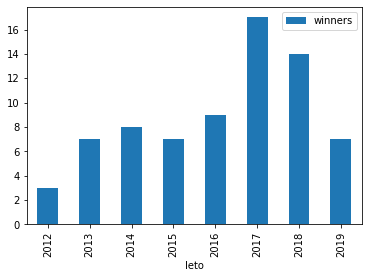

In [8]:
new_najboljse_leto= leto_winner.groupby('leto').sum().reset_index()
new_najboljse_leto.plot(x = 'leto', y = 'winners', kind='bar')

Spodnja grafa prikazujeta, kako se je vrednost glavnega dobitka spreminjala skozi čas in število vseh dobitkov skozi čas.
<br/>(**opomba:** Ko nekdo zadane glavni dobitek, se vrednost glavnega dobitka vrne na začetno vrednost.)

### Vrednost glavnega dobitka po letih

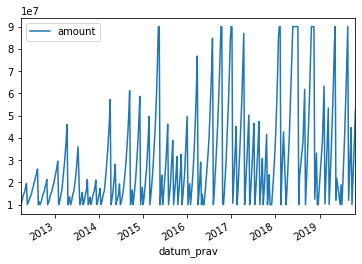

In [9]:
datum_sklad.plot(x ='datum_prav', y='amount')

### Število vseh zmagovalcev po letih

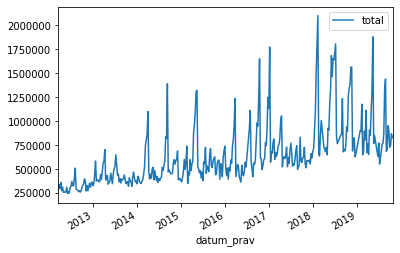

In [10]:
datum_sklad
datum_sklad.plot(x ='datum_prav', y='total')

## Podatki vseh dobitkov
Razpredelnica prikazuje število vseh zmagovalcev posameznih dobitkov za posamezno žrebanje, kjer so *Match 5 and 2 Euro Numbers, Match 5 and 1 Euro Number* ... imena dobitkov.
 

In [11]:
datum_sklad["Match 5 and 2 Euro Numbers"] = podatki_total["Match 5 and 2 Euro Numbers"]
datum_sklad["Match 5 and 1 Euro Number"] = podatki_total["Match 5 and 1 Euro Number"]
datum_sklad["Match 5"] = podatki_total["Match 5"]
datum_sklad["Match 4 and 2 Euro Numbers"] = podatki_total["Match 4 and 2 Euro Numbers"]
datum_sklad["Match 4 and 1 Euro Number"] = podatki_total["Match 4 and 1 Euro Number"]
datum_sklad["Match 4"] = podatki_total["Match 4"]
datum_sklad["Match 3 and 2 Euro Numbers"] = podatki_total["Match 3 and 2 Euro Numbers"]
datum_sklad["Match 2 and 2 Euro Numbers"] = podatki_total["Match 2 and 2 Euro Numbers"]
datum_sklad["Match 3 and 1 Euro Number"] = podatki_total["Match 3 and 1 Euro Number"]
datum_sklad["Match 3"] = podatki_total["Match 3"]
datum_sklad["Match 1 and 2 Euro Numbers"] = podatki_total["Match 1 and 2 Euro Numbers"]
datum_sklad["Match 2 and 1 Euro Number"] = podatki_total["Match 2 and 1 Euro Number"]
datum_sklad
dobitki = ["Match 5 and 2 Euro Numbers", "Match 5 and 1 Euro Number", "Match 5", "Match 4 and 2 Euro Numbers", "Match 4 and 1 Euro Number",
          "Match 4", "Match 3 and 2 Euro Numbers", "Match 2 and 2 Euro Numbers", "Match 3 and 1 Euro Number", "Match 3", "Match 1 and 2 Euro Numbers", "Match 2 and 1 Euro Number"
          ]

datum_sklad1 = datum_sklad.copy()
del datum_sklad1['mesec']
del datum_sklad1['leto']
del datum_sklad1['winners']
datum_sklad1

,datum,amount,total,datum_prav,Match 5 and 2 Euro Numbers,Match 5 and 1 Euro Number,Match 5,Match 4 and 2 Euro Numbers,Match 4 and 1 Euro Number,Match 4,Match 3 and 2 Euro Numbers,Match 2 and 2 Euro Numbers,Match 3 and 1 Euro Number,Match 3,Match 1 and 2 Euro Numbers,Match 2 and 1 Euro Number
0,25.10.2019,52634037,825127,2019-10-25,0,6,5,40,670,1273,1907,29108,33493,59911,164813,533901
1,18.10.2019,40480297,830721,2019-10-18,0,4,5,55,739,1359,2633,35746,34702,62326,164568,528584
2,11.10.2019,29507060,867714,2019-10-11,0,2,5,71,823,1482,2383,35152,37090,66502,177122,547082
3,04.10.2019,19371406,743837,2019-10-04,0,4,0,42,634,984,1720,26246,30981,48247,141637,493342
4,27.09.2019,10000000,727336,2019-09-27,0,1,2,43,641,1097,2218,31649,30751,52050,165478,443406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,20.04.2012,15000000,272768,2012-04-20,0,1,1,23,221,272,935,10163,14154,12395,79453,155150
375,13.04.2012,14000000,361009,2012-04-13,0,0,0,28,387,497,1169,17373,15794,21700,73909,230152
376,06.04.2012,12000000,298684,2012-04-06,0,1,1,12,185,248,852,10782,14301,13437,77156,181709
377,30.03.2012,11000000,338274,2012-03-30,0,5,3,46,667,903,1514,19123,16957,26050,74366,198640


Ta razpredelnica pa prikazuje vsoto vseh glavnih dobitkov, vsoto vseh zmagovalcev in vsoto vseh zmagovalcev posameznih dobitkov.

In [12]:
vsota = datum_sklad1.sum()
del vsota['datum']
vsota

amount                        11231570645
total                           239183490
Match 5 and 2 Euro Numbers             72
Match 5 and 1 Euro Number            1107
Match 5                              1706
Match 4 and 2 Euro Numbers          16125
Match 4 and 1 Euro Number          235896
Match 4                            387038
Match 3 and 2 Euro Numbers         698097
Match 2 and 2 Euro Numbers        9542688
Match 3 and 1 Euro Number        10794252
Match 3                          16893680
Match 1 and 2 Euro Numbers       52533087
Match 2 and 1 Euro Number       148079742
dtype: object

## Podatki o državah
Prva razpredelnica prikazuje različne podatke o državah in o nagradah. 
<br>
Druga prikazuje število dobitnikov 5+2, 5+1 in 5  (v nadaljevanju višji dobitki) po državah.<br>
Spodaj sta še dva grafa, ki prikazujeta število zmagovalcev teh držav ter število prebivalcev. Iz tega lahko vidimo, da države z večjim številom prebivalcev ne nujno večkrat zadanejo višje dobitke. Npr. vidimo lahko, da Italija in Španija kljub vidno višjim številom prebivalcev nista zadele relativno veliko višjih dobitkov.

(Treba je le biti pozoren na to, da niso vse države hkrati začele sodelovati na Euro Jackpotu.)

Legenda:
* **_Nagrada na zmagovalca:_** Koliko denarja v evrih prejme dobitnik določene nagrade 
* **_Zmagovalci iz države:_** število vseh zmagovalcev določene države določenega dobitka
* **_Sklad:_** *Nagrada na zmagovalca* * (krat) *Zmagovalci iz države* v evrih

In [13]:
podatki_po_drzavah

,datum,država,Katera nagrada,Nagrada na zmagovalca,Zmagovalci iz države,Sklad
0,25.10.2019,Slovenia,Match 5 and 2 Euro Numbers,52634037.34,0,0.0
1,25.10.2019,Slovenia,Match 5 and 1 Euro Number,367390.00,0,0.0
2,25.10.2019,Slovenia,Match 5,155600.40,0,0.0
3,25.10.2019,Slovenia,Match 4 and 2 Euro Numbers,6483.30,0,0.0
4,25.10.2019,Slovenia,Match 4 and 1 Euro Number,348.30,6,2089.8
...,...,...,...,...,...,...
50478,23.03.2012,Italy,Match 1 and 2 Euro Numbers,12.20,0,0.0
50479,23.03.2012,Italy,Match 2 and 1 Euro Number,8.40,0,0.0
50480,23.03.2012,Netherlands,Match 5 and 2 Euro Numbers,0.00,0,0.0
50481,23.03.2012,Netherlands,Match 5 and 1 Euro Number,0.00,0,0.0


### Število dobitnikov najvišjih treh dobitkov po državah 

In [14]:
podatki_po_drzavah['katera'] = podatki_po_drzavah['Katera nagrada'] 
visji_dobitki = podatki_po_drzavah[(podatki_po_drzavah.katera == dobitki[0]) | (podatki_po_drzavah.katera == dobitki[1]) | (podatki_po_drzavah.katera == dobitki[2])]
del visji_dobitki["katera"]
drzave = visji_dobitki.groupby('država').sum()['Zmagovalci iz države'].sort_values(ascending=False)
drzave


država
Germany           1107
Finland            275
Denmark            207
Italy               89
Spain               85
Norway              78
Sweden              70
Hungary             52
Netherlands         49
Croatia             40
Slovakia            39
Poland              37
Czech Republic      37
Slovenia            29
Estonia             12
Lithuania            4
Iceland              4
Latvia               3
Name: Zmagovalci iz države, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A31B59C198>,
      dtype=object)

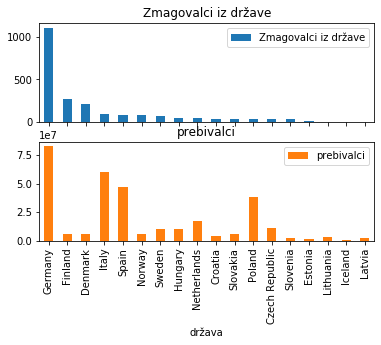

In [15]:
data = {'država':['Germany', 'Finland', 'Denmark', 'Italy', 'Spain', 'Norway', 'Sweden', 'Hungary', 'Netherlands', 
                  'Croatia', 'Slovakia', 'Poland', 'Czech Republic', 'Slovenia', 'Estonia', 'Lithuania', 'Iceland', 'Latvia'], 
        'prebivalci':[82790000, 5513000, 5603000, 60480000, 46660000, 5328000, 10120000, 9773000, 17180000, 4076000, 5450000, 37980000, 
               10650000, 2089000, 1325000, 2793000, 362860, 1920000]} 
  
prebivalci = pd.DataFrame(data) 

drzave_vec = pd.merge(drzave, prebivalci, on='država')

drzave_vec['Razmerje'] = drzave_vec['Zmagovalci iz države'].div(drzave_vec["prebivalci"], axis=0)
drzave_vec.plot(x ='država', y=['Zmagovalci iz države', 'prebivalci'], kind='bar', subplots=True)

### Razmerje med številom zadetkov in številom prebivalcev
(Vidimo lahko, da ima Finska na prebivalca največ dobitnikov višjih nagrad.) 

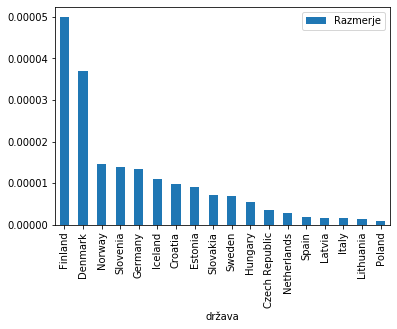

In [16]:
po_vrsti = drzave_vec.sort_values('Razmerje', ascending=False)
po_vrsti.plot(x ='država', y='Razmerje', kind='bar')

## Podatki o Sloveniji

Prva razpredelnica nam pove, kolikokrat so Slovenci zadeli katerikoli dobitek (*Zmagovalci iz države*) ter koliko denarja v evrih so s tem zaslužili (*Sklad*).
<br>(Za druge države ti podatki niso več smiselni, saj nimajo vse države javno objavljeno število dobitkov nižjih nagrad.)

In [17]:
zaslužek = podatki_po_drzavah.groupby('država').sum()
del zaslužek['Nagrada na zmagovalca']
zaslužek_slovenije = zaslužek[15:16]
zaslužek_slovenije

,Zmagovalci iz države,Sklad
država,,
Slovenia,2468575,34259224.3


## Najsrečnejše številke za Slovenijo
Zgornja razpredelnica nam pove, katere številke so bile izžrebane iz prvega bobna, ko je kakšen Slovenec zadel višji dobitek in koliko je bilo takšnih srečnežev.<br>
Spodnja razpredelnica pove enako stvar za drugi boben.

### Prvi boben

In [18]:
slovenija = podatki_po_drzavah[podatki_po_drzavah.država == 'Slovenia']
slovenija['zmagovalci'] = slovenija['Zmagovalci iz države']
slovenija = pd.merge(slovenija, podatki_stevilke, on='datum')
slovenija
a = slovenija[(slovenija.katera == dobitki[0]) | (slovenija.katera == dobitki[1]) | (slovenija.katera == dobitki[2])]
visji = a[a.zmagovalci != 0]
visji[['zmagovalci', 'stevilke']].groupby('stevilke').sum().sort_values('zmagovalci', ascending = False).head(10)

,zmagovalci
stevilke,
33,7
7,7
16,6
14,6
23,6
35,5
15,5
24,5
5,5


### Drugi boben

In [19]:
slovenija = podatki_po_drzavah[podatki_po_drzavah.država == 'Slovenia']
slovenija['zmagovalci'] = slovenija['Zmagovalci iz države']
slovenija = pd.merge(slovenija, podatki_stevilke_euro, on='datum')
slovenija
a = slovenija[(slovenija.katera == dobitki[0]) | (slovenija.katera == dobitki[1]) | (slovenija.katera == dobitki[2])]
visji = a[a.zmagovalci != 0]
visji[['zmagovalci', 'stevilke']].groupby('stevilke').sum().sort_values('zmagovalci', ascending = False).head(10)

,zmagovalci
stevilke,
3,12
5,8
7,8
2,6
10,6
6,5
8,5
4,4
1,2


## Najsrečnejše številke za Nemčijo

### Prvi boben

In [20]:
nemcija = podatki_po_drzavah[podatki_po_drzavah.država == 'Germany']
nemcija['zmagovalci'] = nemcija['Zmagovalci iz države']
nemcija = pd.merge(nemcija, podatki_stevilke, on='datum')
a = nemcija[(nemcija.katera == dobitki[0]) | (nemcija.katera == dobitki[1]) | (nemcija.katera == dobitki[2])]
visji = a[a.zmagovalci != 0]
visji[['zmagovalci', 'stevilke']].groupby('stevilke').sum().sort_values('zmagovalci', ascending = False).head(10)

,zmagovalci
stevilke,
7,268
24,200
35,172
9,149
14,146
3,144
45,143
23,142
33,141


### Drugi boben

In [21]:
nemcija = podatki_po_drzavah[podatki_po_drzavah.država == 'Germany']
nemcija['zmagovalci'] = nemcija['Zmagovalci iz države']
nemcija = pd.merge(nemcija, podatki_stevilke_euro, on='datum')
a = nemcija[(nemcija.katera == dobitki[0]) | (nemcija.katera == dobitki[1]) | (nemcija.katera == dobitki[2])]
visji = a[a.zmagovalci != 0]
visji[['zmagovalci', 'stevilke']].groupby('stevilke').sum().sort_values('zmagovalci', ascending = False).head(10)

,zmagovalci
stevilke,
5,296
3,272
8,252
7,238
9,231
6,212
10,207
1,173
2,170


## Najsrečnejše številke za Finsko

### Prvi boben

In [22]:
finska = podatki_po_drzavah[podatki_po_drzavah.država == 'Finland']
finska['zmagovalci'] = finska['Zmagovalci iz države']
finska = pd.merge(finska, podatki_stevilke, on='datum')
a = finska[(finska.katera == dobitki[0]) | (finska.katera == dobitki[1]) | (finska.katera == dobitki[2])]
visji = a[a.zmagovalci != 0]
visji[['zmagovalci', 'stevilke']].groupby('stevilke').sum().sort_values('zmagovalci', ascending = False).head(10)

,zmagovalci
stevilke,
24,48
7,45
44,41
46,40
3,39
45,38
1,36
18,36
19,35


### Drugi boben

In [23]:
finska = podatki_po_drzavah[podatki_po_drzavah.država == 'Finland']
finska['zmagovalci'] = finska['Zmagovalci iz države']
finska = pd.merge(finska, podatki_stevilke_euro, on='datum')
a = finska[(finska.katera == dobitki[0]) | (finska.katera == dobitki[1]) | (finska.katera == dobitki[2])]
visji = a[a.zmagovalci != 0]
visji[['zmagovalci', 'stevilke']].groupby('stevilke').sum().sort_values('zmagovalci', ascending = False)

,zmagovalci
stevilke,
3,63
8,62
5,61
7,60
1,57
9,56
6,53
10,53
2,48


## Najsrečnejše številke za Italijo

### Prvi boben

In [24]:
italija = podatki_po_drzavah[podatki_po_drzavah.država == 'Italy']
italija['zmagovalci'] = italija['Zmagovalci iz države']
italija = pd.merge(italija, podatki_stevilke, on='datum')
a = italija[(italija.katera == dobitki[0]) | (italija.katera == dobitki[1]) | (italija.katera == dobitki[2])]
visji = a[a.zmagovalci != 0]
visji[['zmagovalci', 'stevilke']].groupby('stevilke').sum().sort_values('zmagovalci', ascending = False).head(10)

,zmagovalci
stevilke,
5,21
23,20
9,19
8,17
7,14
46,13
40,13
4,13
33,12


### Drugi boben

In [25]:
italija = podatki_po_drzavah[podatki_po_drzavah.država == 'Italy']
italija['zmagovalci'] = italija['Zmagovalci iz države']
italija = pd.merge(italija, podatki_stevilke_euro, on='datum')
a = italija[(italija.katera == dobitki[0]) | (italija.katera == dobitki[1]) | (italija.katera == dobitki[2])]
visji = a[a.zmagovalci != 0]
visji[['zmagovalci', 'stevilke']].groupby('stevilke').sum().sort_values('zmagovalci', ascending = False).head(10)

,zmagovalci
stevilke,
3,34
7,20
8,20
9,19
10,18
2,16
5,15
1,14
4,12


## Zaključek
Iz dobljenih podatkov in opravljene analize sem prišel do naslednjih zaključkov:
* Najpogostejše številke prvega bobna so 18, 16, 46, 19, 33.
* Najredkejše številke prvega bobna so 48, 2, 36, 50, 27.
* Najpogostejši številki drugega bobna sta 8 in 5, ki sta skoraj dvakrat pogostejši od najredkejših 10 in 9.
* Največ glavnih dobitkov je bilo leta 2017.
* Država, ki je največkrat zadela najvišje tri dobitke je Nemčija, na prebivalca pa Finska.
* Države z več prebivalci ne zadanejo višje dobitke pogosteje.
* Slovenija je vse skupaj zadela na EuroJackpotu (katerikoli dobitek) 2.468.575 krat in s tem zaslužila 34.259.224,30 €.
* Srečne številke za Slovenijo so 33, 7, 16, 14, 32.
* Srečne številke za Nemčijo so 7, 24, 35 in za Finsko 24, 7, 44.


